# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*


## Библиотека pandas. Упражнения.

In [15]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [3]:
for col in data.columns:
    print(f'В столбце {col} пропущено (количество значений NaN равно) {data[col].isna().sum()}')

В столбце Pregnancies пропущено (количество значений NaN равно) 0
В столбце Glucose пропущено (количество значений NaN равно) 5
В столбце BloodPressure пропущено (количество значений NaN равно) 35
В столбце SkinThickness пропущено (количество значений NaN равно) 227
В столбце Insulin пропущено (количество значений NaN равно) 374
В столбце BMI пропущено (количество значений NaN равно) 11
В столбце DiabetesPedigreeFunction пропущено (количество значений NaN равно) 0
В столбце Age пропущено (количество значений NaN равно) 0
В столбце Class пропущено (количество значений NaN равно) 0


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [4]:
fill_mean_list = ['BMI', 'DiabetesPedigreeFunction']

for col in data.columns:
    if col in fill_mean_list:
        mean = data[col].mean()
        data[col] = data[col].fillna(mean)
    else:
        median = data[col].median()
        data[col] = data[col].fillna(median)
        
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,125.0,33.600000,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.600000,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.300000,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.600000,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.300000,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1


__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [6]:
data.Class[data.Age > 50].sum()

38

__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [7]:
data.nlargest(3, 'Pregnancies')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [8]:
data.Pregnancies[(data.Age >= 30) & (data.Age <= 40) & (data.Pregnancies >= 3)].count()

142

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [9]:
len(data[(data.BloodPressure >= 80) & (data.BloodPressure <= 89)]) / data.BloodPressure.count() * 100

18.880208333333336

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [10]:
len(data[(data.BMI >= 30) & (data.BloodPressure > data.BloodPressure.mean())])

251

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [11]:
# Glucose
mean_gl_diab = data.Glucose[data.Class == 1].mean()
mean_gl_non_diab = data.Glucose[data.Class == 0].mean()

print('Среднее значения уровня глюкозы в крови для женщин с сахарных диабетом {}.' .format(mean_gl_diab))
print('Среднее значения уровня глюкозы в крови для здоровых женщин {}.' .format(mean_gl_non_diab))
print(f'Для болеющих сахарным диабетом женщин среднее значение глюкозы выше на {mean_gl_diab - mean_gl_non_diab}.')

Среднее значения уровня глюкозы в крови для женщин с сахарных диабетом 142.13059701492537.
Среднее значения уровня глюкозы в крови для здоровых женщин 110.682.
Для болеющих сахарным диабетом женщин среднее значение глюкозы выше на 31.44859701492537.


In [12]:
# BloodPressure
mean_bp_diab = data.BloodPressure[data.Class == 1].mean()
mean_bp_non_diab = data.BloodPressure[data.Class == 0].mean()

print('Среднее значения уровня артериального давления для женщин с сахарных диабетом {}.' .format(mean_bp_diab))
print('Среднее значения уровня артериального давления для здоровых женщин {}.' .format(mean_bp_non_diab))
print(f'Для болеющих сахарным диабетом женщин среднее значение артериального давления выше на {mean_bp_diab - mean_bp_non_diab}.')

Среднее значения уровня артериального давления для женщин с сахарных диабетом 75.1231343283582.
Среднее значения уровня артериального давления для здоровых женщин 70.92.
Для болеющих сахарным диабетом женщин среднее значение артериального давления выше на 4.203134328358203.


In [13]:
# Insulin
mean_ins_diab = data.Insulin[data.Class == 1].mean()
mean_ins_non_diab = data.Insulin[data.Class == 0].mean()

print('Среднее значения уровня инсулина в крови для женщин с сахарных диабетом {}.' .format(mean_ins_diab))
print('Среднее значения уровня инсулина в крови для здоровых женщин {}.' .format(mean_ins_non_diab))
print(f'Для болеющих сахарным диабетом женщин среднее значение инсулина в крови ниже на {mean_ins_diab - mean_ins_non_diab}.')

Среднее значения уровня инсулина в крови для женщин с сахарных диабетом 164.70149253731344.
Среднее значения уровня инсулина в крови для здоровых женщин 127.792.
Для болеющих сахарным диабетом женщин среднее значение инсулина в крови ниже на 36.90949253731344.


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

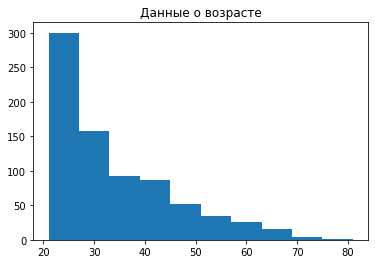

Text(0.5, 1.0, 'Данные об уровне артериального давления')

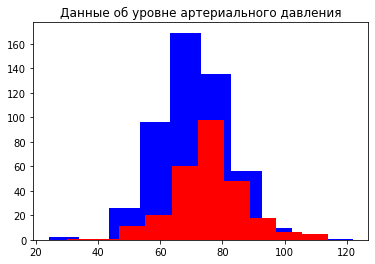

In [16]:
plt.hist(data.Age)
plt.title('Данные о возрасте')
plt.show()

plt.hist(data.BloodPressure[data.Class == 0], color='blue')
plt.hist(data.BloodPressure[data.Class == 1], color=['red'])
plt.title('Данные об уровне артериального давления')

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

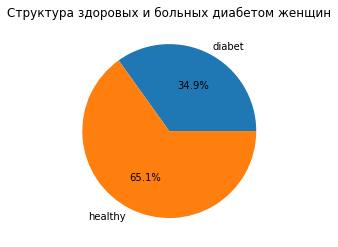

In [17]:
sizes = [len(data[data.Class == 1]), len(data[data.Class == 0])]
plt.pie(sizes, labels=['diabet', 'healthy'], autopct='%1.1f%%')
plt.title('Структура здоровых и больных диабетом женщин')
plt.show()

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

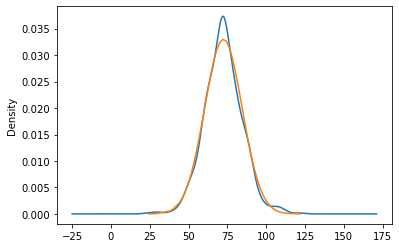

In [18]:
data.BloodPressure.plot.density()
plt.plot(data.BloodPressure.sort_values(), norm.pdf(data.BloodPressure.sort_values(), data.BloodPressure.mean(), data.BloodPressure.std()))

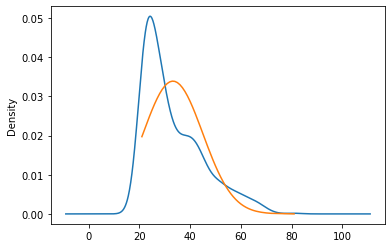

In [19]:
data.Age.plot.density()
plt.plot(data.Age.sort_values(), norm.pdf(data.Age.sort_values(), data.Age.mean(), data.Age.std()))

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

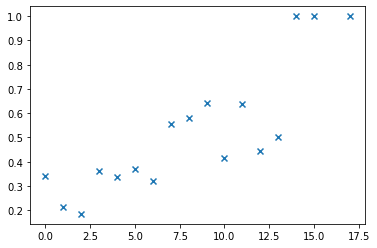

In [20]:
all_women = data.Pregnancies.value_counts()
diab_women = data.Pregnancies[data.Class == 1].value_counts()
perc_diab_women = diab_women / all_women
plt.scatter(perc_diab_women.axes, perc_diab_women.values, marker='x')

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [21]:
data['wasPregnant'] = (data.Pregnancies > 0).astype('int32')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,125.0,33.600000,0.627,50,1,1
1,1,85.0,66.0,29.0,125.0,26.600000,0.351,31,0,1
2,8,183.0,64.0,29.0,125.0,23.300000,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1,0
5,5,116.0,74.0,29.0,125.0,25.600000,0.201,30,0,1
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1,1
7,10,115.0,72.0,29.0,125.0,35.300000,0.134,29,0,1
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1,1
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1,1


__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [22]:
diab_child = data.Class[data.wasPregnant == 1].mean()
diab_child_free = data.Class[data.wasPregnant == 0].mean()
print(f'Доля больных сахарным диабетом женщин, которые были беременны, составляет {diab_child}.')
print(f'Доля больных сахарным диабетом женщин, которые не были беременны, составляет {diab_child_free}.')
print(f'Среди имевших беременность женщин доля больных больше на {diab_child - diab_child_free}, чем среди женщин без детей.')

Доля больных сахарным диабетом женщин, которые были беременны, составляет 0.350076103500761.
Доля больных сахарным диабетом женщин, которые не были беременны, составляет 0.34234234234234234.
Среди имевших беременность женщин доля больных больше на 0.007733761158418673, чем среди женщин без детей.


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [23]:
def get_cat(x):
    if x < 18.5:
        return 'Underweight'
    elif 18.5 <= x < 25:
        return 'Normal weight'
    elif 25 <= x < 30:
        return 'Overweight'
    else:
        return 'Obesity'

data['bodyType'] = data['BMI'].apply(get_cat)

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,125.0,33.600000,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.600000,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.300000,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1,0,Obesity
5,5,116.0,74.0,29.0,125.0,25.600000,0.201,30,0,1,Overweight
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1,1,Obesity
7,10,115.0,72.0,29.0,125.0,35.300000,0.134,29,0,1,Obesity
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1,1,Obesity
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1,1,Obesity


__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [25]:
healthy_women_data = data[(data.bodyType == 'Normal weight') & (data.BloodPressure >= 80) & (data.BloodPressure <= 89)]
print(f'Среди "здоровых" женщин сахарным диабетом больны {healthy_women_data.Class.mean() * 100}%.')

Среди "здоровых" женщин сахарным диабетом больны 10.0%.
